In [21]:
import pandas as pd

In [22]:
train = pd.read_csv("train.csv")

In [23]:
train['label_2'].fillna(train['label_2'].mean(), inplace=True)

In [24]:
train['label_2'] = train['label_2'].astype(int)

In [25]:
train.dropna(subset=['label_4'], inplace=True)

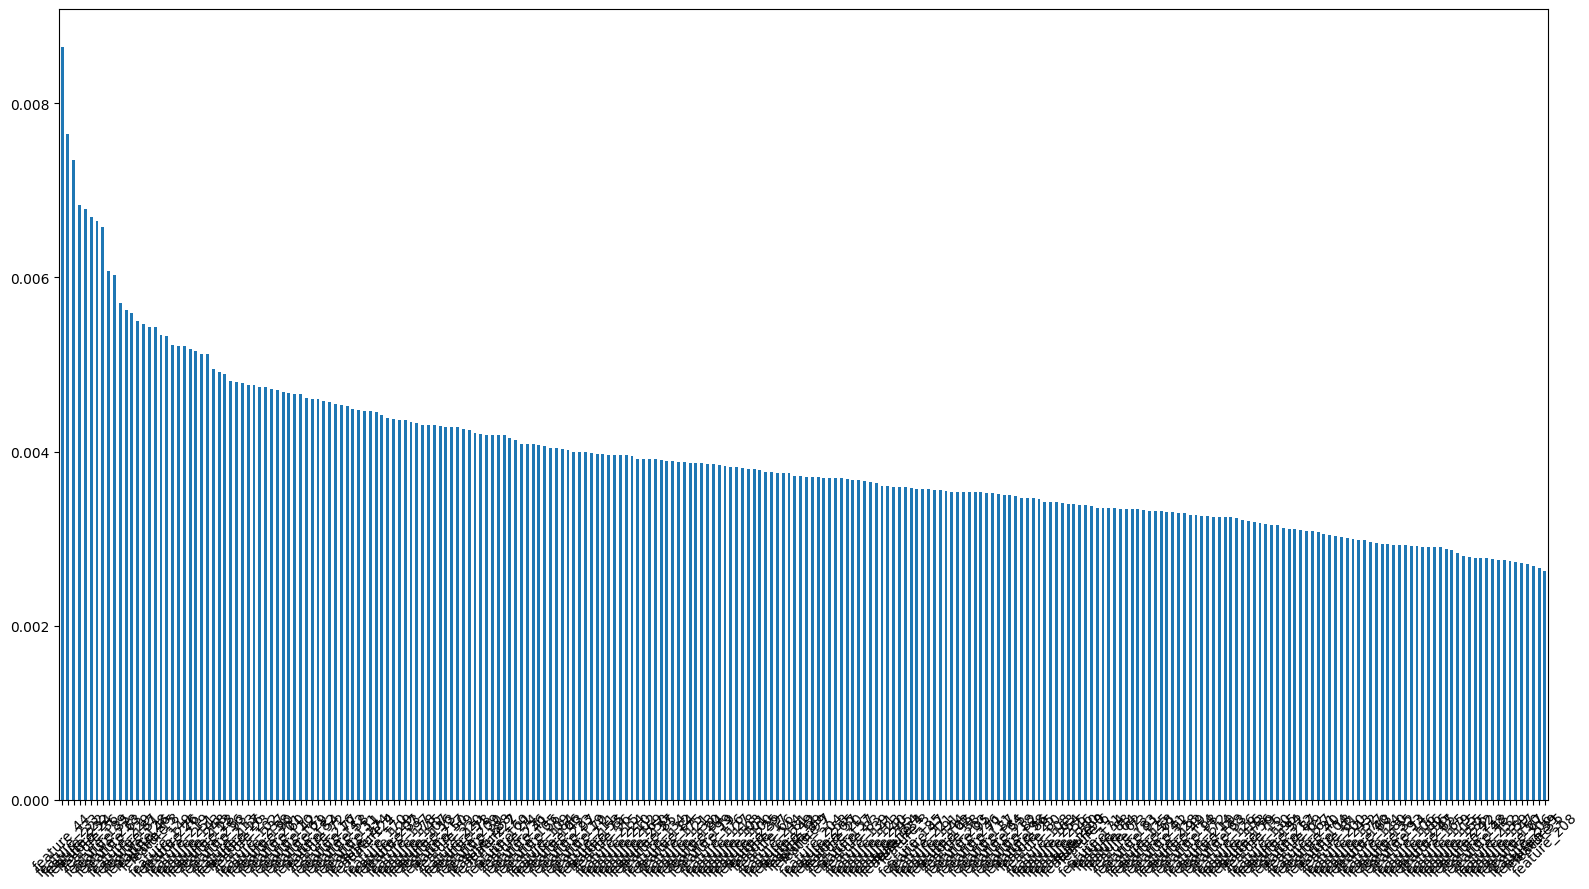

In [26]:
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

X = train.drop(['label_1', 'label_2', 'label_3', 'label_4'], axis=1)
y = train['label_1']

clf = RandomForestClassifier()
clf.fit(X, y)

importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=45)

plt.tight_layout()
plt.show()


In [37]:
importances = clf.feature_importances_

f_importances = pd.Series(importances, X.columns)

f_importances.sort_values(ascending=False, inplace=True)

threshold = 0.0035

selected_features = f_importances[f_importances > threshold]

X_selected = X[selected_features.index]

In [60]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
def separate_dataset(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return X_train, X_test, y_train, y_test

def train_model(X_train, y_train):
    model = svm.SVC(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, X_test, y_train, y_test):
    print(f"Training score: {model.score(X_train, y_train)}")
    print(f"Testing score: {model.score(X_test, y_test)}")

def evaluate_model_detailed(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [62]:
X_train, X_test, y_train, y_test = separate_dataset(X_selected, y)

In [52]:
model1 = train_model(X_train, y_train)

In [53]:
evaluate_model(model1, X_train, X_test, y_train, y_test)

Training score: 0.9976958525345622
Testing score: 0.9891304347826086


In [54]:
evaluate_model_detailed(model1, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       150
           2       0.99      0.99      0.99       140
           3       0.99      0.99      0.99       123
           4       1.00      0.99      1.00       150
           5       0.98      1.00      0.99       128
           6       1.00      0.99      0.99       141
           7       0.98      1.00      0.99       130
           8       0.98      1.00      0.99       121
           9       1.00      1.00      1.00       141
          10       0.99      0.99      0.99       161
          11       0.99      1.00      1.00       138
          12       1.00      1.00      1.00       145
          13       1.00      0.99      1.00       141
          14       0.99      0.99      0.99       138
          15       0.98      0.99      0.99       139
          16       1.00      1.00      1.00       144
          17       0.99      0.99      0.99       145
    

In [67]:
test = pd.read_csv("test.csv")

In [68]:
test = test[test.columns.difference(['label_1', 'label_2', 'label_3', 'label_4'])]

In [69]:
test = test[selected_features.index]

In [70]:
test['label_1'] = model1.predict(test)

In [71]:
test.head()

,feature_44,feature_233,feature_222,feature_232,feature_24,feature_36,feature_189,feature_35,feature_238,feature_63,...,feature_95,feature_246,feature_71,feature_111,feature_37,feature_164,feature_55,feature_218,feature_82,label_1
0,-2.880708,-0.037238,-2.488485,3.213434,-2.638312,1.681010,-2.292039,0.266292,0.271643,-0.718918,...,1.786763,0.821259,-0.745785,-1.359618,-1.216050,2.591719,-1.313301,-0.488608,-1.027884,45
1,-1.843359,0.471878,-0.338778,2.982787,-1.772872,3.269116,-2.218468,-1.298551,1.295099,-1.786027,...,-1.154412,0.881759,-0.596263,-4.113818,-0.720517,4.189999,0.262073,-1.799922,-1.011938,45
2,-2.667108,0.470122,-1.267447,1.613180,-0.951068,3.436413,-1.175321,-0.182867,-0.091886,-1.375602,...,-0.637527,-1.200260,1.368735,-3.760175,-0.877431,3.301882,0.597548,-1.364816,-0.394260,45
3,-2.529230,1.719265,-0.362242,1.478879,-2.279987,3.524469,-1.837382,-0.716867,1.241378,-1.391473,...,-0.115114,-1.511722,0.165003,-2.069389,0.241719,2.161567,-1.514911,-1.198193,0.064700,45
4,-1.740185,1.012408,-1.654874,2.756927,0.288694,1.471479,-2.691330,-0.318224,0.460157,-0.442566,...,0.636656,0.789522,-0.787115,-2.231963,0.768582,1.659692,-0.596887,-1.131368,-1.621290,45


In [72]:
test.to_csv('test_with_predictions_label1.csv', index=False)